In [1]:
library(Seurat)
library(ggplot2)
library(data.table)

Attaching SeuratObject



In [2]:
#### Load counts and annotations for Batch #1, COH099 ####------------------
COH099.counts <- fread("./COH099_txt", header=T)
COH099.annot <- read.delim("./COH099_metadata.txt", header=T, fill=T)

In [8]:
dim(COH099.counts)
dim(COH099.annot)

[1]  22999 132406

[1] 132406     11

In [9]:
rownames(COH099.counts)[1:10]
colnames(COH099.counts)[1:10]

[1] "MIR1302-2HG" "FAM138A"     "OR4F5"       "LINC01409"   "FAM87B"     
 [6] "LINC00115"   "FAM41C"      "LINC02593"   "SAMD11"      "NOC2L"

[1] "AB-38A_AAACCCAAGACTGGGT" "AB-38A_AAACCCAAGATCGCCC"
 [3] "AB-38A_AAACCCAAGGGTTGCA" "AB-38A_AAACCCACAAGAATAC"
 [5] "AB-38A_AAACCCACAAGACGGT" "AB-38A_AAACCCACAGAGAAAG"
 [7] "AB-38A_AAACCCACATCTCCCA" "AB-38A_AAACCCAGTACTCGTA"
 [9] "AB-38A_AAACCCAGTAGGACCA" "AB-38A_AAACCCAGTAGGAGTC"

In [10]:
gids <- COH099.counts$`Gene Symbol`
x <- which(gids != "")
dup <- which(duplicated(gids[x]))
x <- x[-dup]

COH099.counts <- COH099.counts[x, 4:ncol(COH099.counts)]
COH099.counts <- as.matrix(COH099.counts)
rownames(COH099.counts) <- gids[x]

ERROR: Error in COH099.counts$`Gene Symbol`: $ operator is invalid for atomic vectors


In [11]:
dim(COH099.counts)
dim(COH099.annot)

[1]  22999 132406

[1] 132406     11

In [7]:
rownames(COH099.annot)<- COH099.annot$Cell

In [13]:
#### Create Seurat object ####
COH099.seurat <- CreateSeuratObject(COH099.counts, min.cells = 3, min.features = 50, meta.data = COH099.annot)

Warning message:
“The following arguments are not used: row.names”


In [14]:
rm(COH099.counts)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3002055,160.4,6150587,328.5,6150587,328.5
Vcells,628254455,4793.3,5132547555,39158.3,6404326741,48861.2


In [15]:
dim(COH099.seurat) 
mean(COH099.seurat$Percent.Mitochondria) 
median(COH099.seurat$Percent.Mitochondria)

[1]  20521 132359

[1] 13.60388

[1] 6.3

In [16]:
options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 100)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



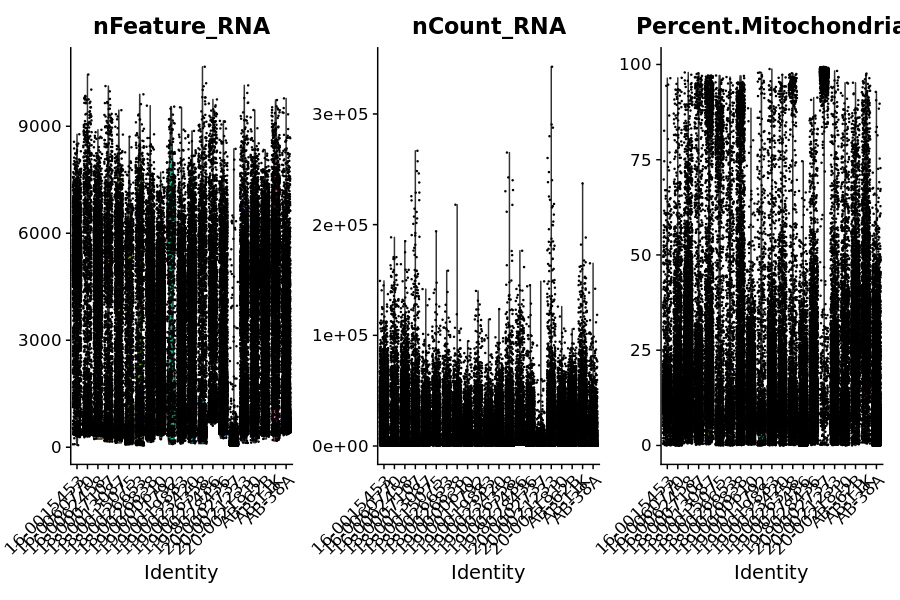

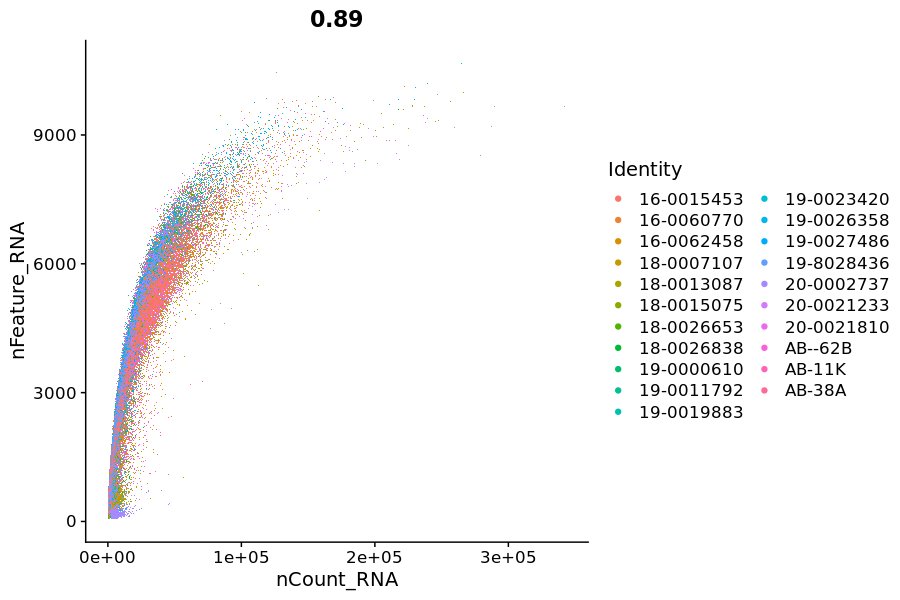

In [17]:
#### QC Plots before filtering ####
VlnPlot(COH099.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH099.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)

In [18]:
#### Export plots pre-filtering ####
pdf("./Figures/COH099.Seurat.PreQC.pdf", width=16, height=12)
VlnPlot(COH099.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH099.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)
par(mar=c(6,8,3,2))
barplot(table(COH099.seurat$Sample), horiz = T, las=2)
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

In [19]:
#### Filter ####
COH099.seurat <- subset(x=COH099.seurat, 
                       nCount_RNA > 1000 & 
                       nCount_RNA < 80000 & 
                       nFeature_RNA > 500 &
                       Percent.Mitochondria < 50)

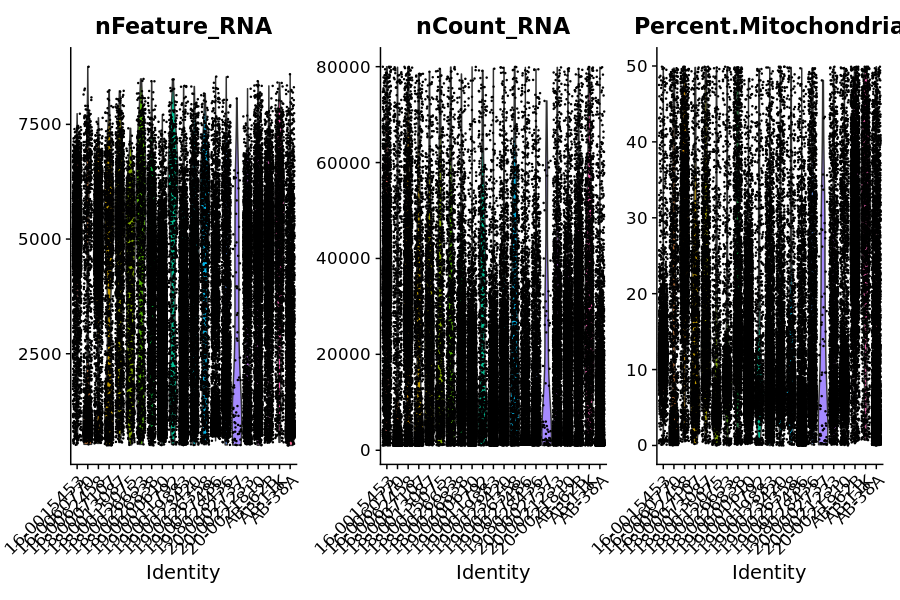

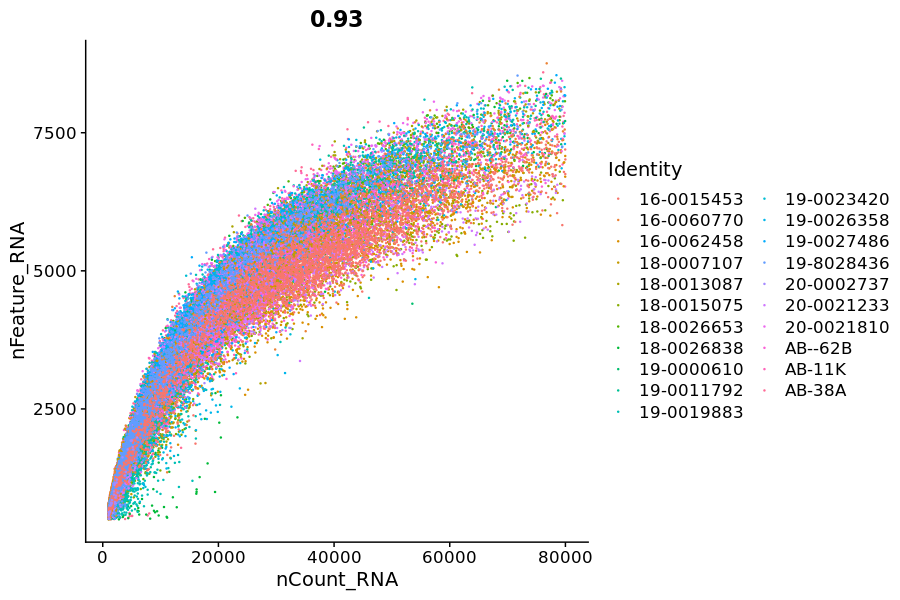

In [20]:
#### QC Plots after filtering ####
VlnPlot(COH099.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH099.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)

In [21]:
pdf("./Figures/COH099.Seurat.AfterQC.pdf", width=16, height=12)
VlnPlot(COH099.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH099.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)
par(mar=c(6,8,3,2))
barplot(table(COH099.seurat$Sample), horiz = T, las=2)
dev.off()

png 
  2

In [22]:
dim(COH099.seurat)

[1] 20521 76806

In [73]:
#saveRDS(COH099.seurat, file="COH099.seurat.RDS")

In [24]:
library(qs)

qs v0.25.1.



In [25]:
qsave(COH099.seurat, "COH099.seurat_v2.qs", nthreads=16)